# PHYS 2820
## Review: Lectures 1-6

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import sympy as sp
sp.init_printing(use_latex='mathjax') # pretty printing with LaTeX
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import tqdm
from ipywidgets import interactive, fixed

- - - 
## DataCamp exercises

To learn more about Python, continue to work through the following [DataCamp](http://datacamp.com) chapters over the next week:
- Introduction to Python: Python Basics
- Introduction to Python: Functions and Packages 
- Introduction to Python: NumPy 
- Intermediate Python for Data Science: Matplotlib 
- Intermediate Python for Data Science: Logic, Control Flow and Filtering 
- Intermediate Python for Data Science: Loops

- - - 
## Textbook readings

Read the following sections from [CSM Chapter 1](https://www.compadre.org/osp/document/ServeFile.cfm?ID=7375&DocID=2144&DocFID=3570&Attachment=1)
- 1.1 Importance of computers in physics
- 1.2 The importances of computer simulation
- 2.1 Introduction
- 2.2 Simulation free fall
- 3.7 Effect of Drag Resistance
- 3.8 Two-Dimensional Trajectories
- 3.10 Visualizing Three-Dimensional Motion
- 4.1 Simple Harmonic Motion
- 3.1 Modified Euler Algorithms
- 4.2 The Motion of a Pendulum
- 4.3 Damped Harmonic Oscillator
- 4.4 Response to External Forces
- 5.6 Simulation of the Orbit
- 5.1 Planetary Motion
- 5.2 The Equations of Motion
- 5.3 Circular and Elliptical Orbits
- 5.4 Astronomical Units
- 5.5 Log-log and Semilog Plots
- 5.6 Simulation of the Orbit
- 5.9  A Mini-Solar System


# Computer Simulation in Physics
## Lecture 1

One-decay process

$$\frac{\mathrm{d}N}{\mathrm{d}t} = -k \; N$$



## Exact symbolic solution

In [10]:
t, k, N0 = sp.symbols('t, k, N0')
N = sp.symbols('N', cls=sp.Function)

In [11]:
ode = sp.Eq(N(t).diff(t), -k * N(t) )
ics = {N(0): N0}

sp.dsolve(ode, ics=ics)

           -k⋅t
N(t) = N₀⋅ℯ    

## Numerical Method

Euler's Method: 

$$N_{i+1} = N_i + (-k N_i) \Delta t$$

## Numerical solution

In [18]:
def Stepper(t0=0, dt=0.1, tmax=5, N0=10):
    t = t0
    N = N0
    k = 3
    
    while True:
        yield( {'t':t, 'N':N} )
        
        if t > tmax:
            break
        
        N = N + (-k*N)*dt
        t = t + dt
    
def Plot(data):
    plt.plot(data.t, data.N, label='Numerical solution')
    plt.xlabel('t')
    plt.ylabel('N')

def App():
    stepper = Stepper()
    data = pd.DataFrame(stepper)
    
    return data
    
data = App()

In [19]:
def PlotExact(data):
    t = data.t
    k = 3
    Nexact = data.N.iloc[0] * np.exp(-k*t)
    
    plt.plot(t, Nexact, label='Exact solution')

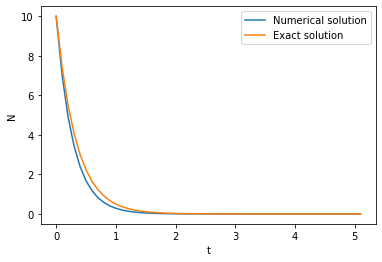

In [20]:
Plot(data)
PlotExact(data)
plt.legend()

# Tools for Doing Simulations
## Lecture 2

### Example: A falling ball

$$ F_g = -mg $$


#### Equation of motion

Newton's second law:

$$ F = ma $$

and writing the acceleration as derivative,

$$ m \frac{\mathrm{d}^2y}{\mathrm{d}t^2} = F = -mg $$

This model is a *second-order differential equation* (2nd order DE).

The analytical solution is already know from first year physics:

$$\begin{align}
y(t) &= y(0) + v(0) t -\frac{1}{2} g t^2\\
v(t) &= v(0) -g t
\end{align}
$$

#### Numerical solution

Rewrite 2nd order DE as a pair of *1st order DEs*:
$$\begin{align}
\frac{\mathrm{d}y}{\mathrm{d}t} &= v \\
\frac{\mathrm{d}v}{\mathrm{d}t} &= -g \\
\end{align}
$$


*Approximate* the derivatives by small (finite) differences:

$$\begin{align}
\frac{y(t+\Delta t) - y(t)}{\Delta t} &= v(t) \\
\frac{v(t+\Delta t) - v(t)}{\Delta t} &= -g 
\end{align}
$$

Notice that in the limit of $ \Delta t \rightarrow 0$, this approximation reduces to the pair of 1st order DEs.

Rewrite the equations as

$$
\begin{align}
y(t + \Delta t) & = y(t) + v(t) \Delta t \\
v(t + \Delta t) & = v(t) -g \Delta t
\end{align}
$$

This is an example of the **Euler algorithm** which found using a *finite difference* equation where $\Delta t$ is the time step.



- - -

### **Exercise 2.1** A simple example
Consider the first-order differential equation
$$\frac{\mathrm{d}y}{\mathrm{d}x} = f(x)$$

where $f(x)$ is a function of $x$. The approximate solution as given by the Euler algorithm is

$$ y_{n+1} = y_n + f(x_n) \Delta x.$$
Note that the rate of change of $y$ has been approximated by its value the *beginning of the interval*, $f(x_n)$

a. Suppose that $f(x) = 2x$ and $y(x=0) = 0$. The analytical solution is $y(x) = x^2$, which we can confirm by taking the derivative of $y(x)$.
Convert the first-order differential equation into a finite difference equatino using the Euler algorithm. For simplicity, choose $\Delta x = 0.1$. It may be a good idea to first use a calculator or pencil and paper to determine $y_n$ for the first several time steps.

b. Plot the difference between the exact solution and the approximate solution given by the Euler algorithm. What condition would the rate of change, $f(x)$, have to satisfy for the Euler algorithm to give the exact answer?

*(will appear on Assignment 1)*
- - -

## Simulating free fall
$$\begin{align}
\frac{\mathrm{d}y}{\mathrm{d}t} &= v \\
\frac{\mathrm{d}v}{\mathrm{d}t} &= -g \\
\end{align}
$$

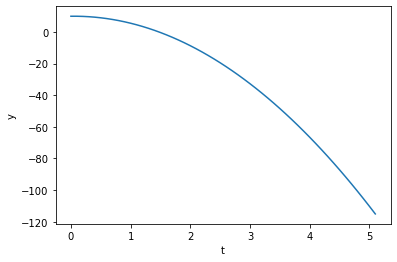

In [35]:
def Stepper(t0=0, dt=0.1, tmax=5, v0=0, y0=10, g=9.81):
    t = t0
    y = y0
    v = v0
    
    while True:
        yield( {'t':t, 'y':y, 'v':v} )
        
        if t > tmax:
            break
        
        # Euler's method
        y = y + ( v)*dt
        v = v + (-g)*dt
        
        t = t + dt
    
def Plot(data):
    plt.plot(data.t, data.y)
    plt.xlabel('t')
    plt.ylabel('y')

def App(tmax=5):
    stepper = Stepper(tmax=tmax)
    data = pd.DataFrame(stepper)
    
    return data
    
data = App()
Plot(data)

### String formatting

In [23]:
a = 1.2345

In [30]:
print("a = {}".format(a))
print("a = {:.2f}".format(a))
print(f"a = {a:.2f}")
print(f"3*a = {(3*a):.2f}")

a = 1.2345
a = 1.23
a = 1.23
3*a = 3.70


Here, we are formatting the string so that 3 places are used after the decimal point.  Python string formatter can also be use to control the width of number, padding with spaces or zeros, and/or displaying in exponential notation.  

See [https://pyformat.info/](https://pyformat.info/) for additional examples of string formats.

### Alternative to `while True:`

```
nSteps = 1000
for i in range(nSteps):
    ## numerical method goes here
```

# Writing Numerical Programs
## Lecture 3

We can use better program structure by splitting up the work our main function into  sub-tasks.

- A `Stepper()` function to iterate through the numerical method.
- A `Plot()` function to display the results
- An `App()` function to bring it all together and *drive* the simluation.

In [33]:
from ipywidgets import interactive

In [38]:
def FallingBallInteractiveApp(tmax=5):
    
    dt = 0.01
    ball = App(tmax=tmax)
    Plot(ball)
    
interactive(FallingBallInteractiveApp, tmax=(0,5,0.1))

interactive(children=(FloatSlider(value=5.0, description='tmax', max=5.0), Output()), _dom_classes=('widget-in…

**Note** `interactive` will not be on the Final Exam.

### Bouncing ball

To model a *bounce* with energy loss, use

In [43]:
v = -1
y = -1
loss = 0.50
print(f'Before bounce: v={v:.2f} y={y}')

# model the bounce
if y < 0:
    # assume energy is reduced by a fractional loss
    m = 1 # assume ball mass is 1
    E = 0.5 * m * v**2 # kinetic energy
    Enew = E*(1-loss)
    v = np.sqrt(2*Enew / m)

    y = -y
    
print(f'After Bounce: v={v:.2f} y={y}')

Before bounce: v=-1.00 y=-1
After Bounce: v=0.71 y=1


- - -
### **Exercise** Model a falling ball

a. Write a new program called `FallingBallApp` that models and then plots the vertical position verus time for a falling ball under gravity that stops when it hits the ground.  You will need to create a new function `FallingBallStepper` that yields the output at every time step. Your program should call a new function `FallingBallPlot` that plots both the numerical results **and** the analytical solution for all time steps. Be sure to include a legend and label your axes. Run your program in a Jupyter notebook to show your plot.

b. Modify your `FallingBallApp` program so that it take a single argument `dt` to set the time step.  Make your program interactive (`from ipywidgets import interactive`) to explore how the numerical solution differs from the analytical solution. How much smaller does $\Delta t$ have to be to reduce the error in the numerical results by a factor of two for the same final time? What about a factor of four? How does the error depend on $\Delta t$?

(*Assignment 1*)

# Effects of Drag Resistance
## Lecture 4

The more general problem is to have an arbitrary sum of forces $F_{\mathrm{net}}$ acting on a particle. Then the equation of motion $F_{\mathrm{net}} = m  \frac{\mathrm{d}^2y}{\mathrm{d}t^2} $ leads to 

$$\begin{align}
\frac{\mathrm{d}y}{\mathrm{d}t} &= v \\
\frac{\mathrm{d}v}{\mathrm{d}t} &= \frac{F_{\mathrm{net}}}{m} . \\
\end{align}
$$

Approximating the derivatives as finite differences leads again to Euler's method:

$$
\begin{align}
y(t + \Delta t) & = y(t) + v(t) \Delta t \\
v(t + \Delta t) & = v(t) + \frac{F_{\mathrm{net}}}{m}  \Delta t.
\end{align}
$$

or 
```
y = y + v*dt
v = v + Fnet/m*dt
```

It is important to recognize that that Euler's method is a numerical algorithm for solving differential equations. There is nothing special at all about the problem being about a falling particle.  In the most general case, we can approximately solve the  differential equation

$$ \frac{\mathrm{d}y}{\mathrm{d}t} = f(y, t)$$

with the algorithm

$$y(t + \Delta t) = y(t) + f(y(t), t) \Delta t$$

where $f(y, t)$ is any mathematical function of $y$ and (optionally) $t$.

- - -

### **Problem 3.7** Position-dependent force

Extend `FallingParticleStepper()` and `FallingParticleApp()` to simulate the fall of a particle with the position-dependent force law $F = mg\left(1-2\frac{y}{R}\right)$. Assume that a particle is dropped from a height $h$ with zero initial velocity and compute its impact velocity (speed) when it hits the ground at $y= 0$. Determine the value of $h$ for which the impact velocity differs by one percent from its value with a constant acceleration $g=9.8\; \mathrm{m/s}^2$. Take $R= 6.37\times10^6\;\mathrm{m}$. Make sure that the one percent difference is due to the physics of the force law and not the accuracy of your algorithm (this can be confirmed by showing that the result changes by signifcantly less than one percent if you half the size of your time step).

*(will be part of Assignment 2)*
- - - 

## Drag force due to air resistance

For particles near the Earth's surface, a more important modication is to include the drag force due to air resistance.  

The direction of the drag force $F_{d}$ is opposite to the velocity of the particle. 

For a falling body, $F_{d}$ is upward since the velocity is downwards. 

Hence the total force $F$ on a falling body is

$$ F = - m g + F_{d}.$$



### Empirical model for drag force

Two common ways of modelling a drag force are

$$ F_{d}(v) =  C_1 v, $$

and
$$ F_{d}(v) = C_2 v^2,$$

where $C_1$ and $C_2$ depend on the properties of the fluid and the shape of the object.

Unlike kinetic friction between two sliding surfaces which depends only on the normal force, drag friction depends on the speed, $v$,  of the object.

At very low velocities, the behaviour is essentially linear (this is called **Stokes's Law**) and is represented by the $C_1$ term the linear dependence on $v$.

At more reasonable velocities the behaviour is quadratic as given by the $C_2$ term.

From fluid dynamics, exact values of $C_2$ can be computed only for idealized shapes such as spheres and cylinders. For real objects with more complicated geometries $C_2$ can not be calculated and must be measured from experiment.  We can, however, rewrite the quadratic the drag force as

 $$ F_d =  \frac{1}{2} C_d \rho A v^2$$

where $\rho$ is the density of air, $A$ is the frontal cross-sectional area of the falling object, and $C_d$ is called the **drag coefficient**.  $C_d$ depends on the aerodynamics and shape of an object and it is typically between 0.5 and 1.5 in value.

## Falling paper bag

In [45]:
def PaperBagStepper(A=0.016, dt=0.01, y0=10, v0=0, tmax=2):
    """
    Model a falling object of cross-sectional area A.
    """
        
    # initialize the model
    g = 9.8 # m/s2
    ρ = 1.225 # kg/m3, air
    Cd = 1.0 
    m = 0.012 # kg
    
    t = 0
    y = y0
    v = v0
    
    while True:
        model = {'t': t, 'y': y, 'v': v}
        yield model # return to the caller
            
        if t > tmax:
            break
        
        Fg = -m*g
        Fd = 0.5 * Cd * ρ * A * v**2
        Fnet = Fg + Fd
        
        # use the Euler algorithm to update the state of the model
        y = y + v*dt
        v = v + Fnet/m*dt
        t = t + dt


We need at least one function to visualize the results. Here we are using the function `plt.subplots()` to create two axes. In the top one we plot the position vs time. and the bottom one we plot the velocity vs time.

In [46]:
def FirstPaperBagPlot(bag):
    fig, axs = plt.subplots(2, 1)
    axs[0].plot(bag.t, bag.y)
    axs[0].set_ylabel('y (m)')
    
    axs[1].plot(bag.t, bag.v)
    axs[1].set_ylabel('v (m)')
    axs[1].set_xlabel('t (s)')

And a driver program to put it all together

In [47]:
def FirstPaperBagApp(A=0.016):
    
    model = PaperBagStepper(A=A)
    bag = pd.DataFrame(model)
    
    FirstPaperBagPlot(bag)

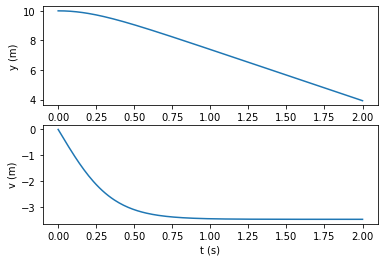

In [48]:
FirstPaperBagApp()

To extract out the terminal speed we need to look at the last row in the data frame.

In [49]:
model = PaperBagStepper()
bag = pd.DataFrame(model)
bag.tail()

,t,y,v
196,1.96,4.065890,-3.464022
197,1.97,4.031249,-3.464027
198,1.98,3.996609,-3.464031
199,1.99,3.961969,-3.464035
200,2.00,3.927329,-3.464039


In Pandas, you can reference a particular row with `.iloc[]`

In [51]:
bag.iloc[200]

t    2.000000
y    3.927329
v   -3.464039
Name: 200, dtype: float64

Using the index `-1` gives you the last row in the data frame

In [52]:
bag.iloc[-1]

t    2.000000
y    3.927329
v   -3.464039
Name: 200, dtype: float64

We may want to show the the results for many different cross-sectional areas all in one plot.

In [53]:
def SecondPaperBagApp():
    
    # set of cross-sectional areas
    As = np.arange(0.005, 0.05, 0.005)
    
    # list to hold the terminal speeds, v
    vs = []
    
    # we want to reuse the figure axes so we create a single set of axes
    # here in the driver program
    fig, axs = plt.subplots(2, 1)
    for A in As:
        model = PaperBagStepper(A=A, dt=0.001)
        bag = pd.DataFrame(model)
    
        # take the absolute value of velocity as the terminal speed
        v = abs(bag.iloc[-1].v)
        # store this value for later
        vs.append(v)
        
        # the axes are passed into the plotting function
        SecondPaperBagPlot(bag, axs)
        
    plt.subplots(1, 1)
    plt.plot(As, vs, 'o-')
    plt.xlabel('Cross-sectional area $A$ (m$^2$)')
    plt.ylabel('Terminal Speed $v$ (m/s)')
    

In [54]:
def SecondPaperBagPlot(bag, axs):
    axs[0].plot(bag.t, bag.y)
    axs[0].set_ylabel('y (m)')
    
    axs[1].plot(bag.t, bag.v)
    axs[1].set_ylabel('v (m)')
    axs[1].set_xlabel('t (s)')

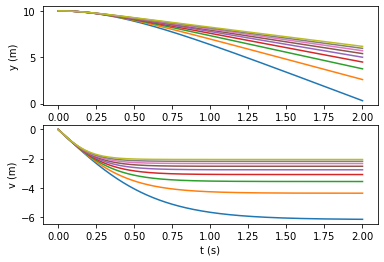

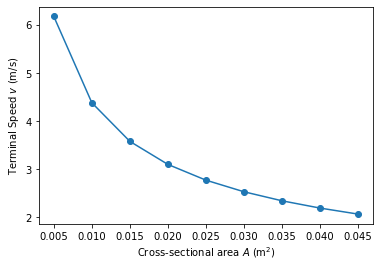

In [55]:
SecondPaperBagApp()

This shows, as expected, as the cross-sectional area increases the terminal speed decreases.

# Two-Dimensional Trajectories
## Lecture 5

In the absence of air-resistance, the equations of motion (Newton's 2nd Law) are:

$$
\begin{eqnarray}
m\frac{d^2 x}{dt^2} =& 0 \\
m\frac{d^2 y}{dt^2} =& -mg
\end{eqnarray}
$$

These are second-order differential equations.  A standard technique for solving higher order differential equations is to rewrite them as a system of first order differential equations.  That is,

$$
\begin{eqnarray}
\frac{d x}{dt} =& v_x \\
m\frac{d v_x}{dt} =& 0 \\
\frac{d y}{dt} =& v_y \\
m\frac{d v_y}{dt} =& -m g
\end{eqnarray}
$$

There are now four equations written out for the variables $x, y, v_x, v_y$.  As before, we can solve this problem by using Euler's method:

$$
\begin{align}
x_{i+1} &= x_i + v_{x,i} \Delta t \\
v_{x,i+1} &= v_{x,i} \\
y_{i+1} &= y_i + v_{y,i} \Delta t \\
v_{y,i+1} &= v_{y,i} - g \Delta t
\end{align}
$$

This algorithm allows us to estimate the position and velocity of a projectile given the intial values of $x, y, v_x$, and $v_y$. In this notation the subscript $_{i+1}$ indicate the next time step and the subscript $_{i}$ indicates the current time step. 

This notation is used in the sense

$$
\begin{align}
x_i &= x(t_i) \\
x_{i+1} &= x(t_{i+1i}) \\
v_{y, i+1} &= v_y(t_{i+i})
\end{align}
$$

and so on for each variable. The idea is we are evaluating the function $x(t)$, $y(t)$, $v_x(t)$, and $v_y(t)$ and the specific points $t = t_0, t_1, t_2, \ldots, t_i, t_{i+1}, \ldots$


Like in the falling particle problem, air resistance is important. To introduce air resistance we can model the drag as

$$ F_{d} = - C_2 v^2 $$

like we did in the falling particle problem where $v$ is the magnitude of the velocity vector. Since force is vector so we need to split this into horizontal and vertical components.

This force is a vector and always directed in the opposite direction of the velocity vector.

\begin{align}
F_{d,x} = F_{d} \cos \theta = F_{d} (v_x / v) \\
F_{d,y} = F_{d} \sin \theta = F_{d} (v_y / v)
\end{align}

we can write

$$
\begin{align}
F_{d, x} = - C_2 v v_x \\
F_{d, y} = - C_2 v v_y 
\end{align}
$$

*Whiteboard exercise to draw out these vectors.*

So the new equations of motion will be

$$
\begin{eqnarray}
\frac{d x}{dt} =& v_x \\
m \frac{d v_x}{dt} =& F_{d,x} \\
\frac{d y}{dt} =& v_y \\
m\frac{d v_y}{dt} =& -mg + F_{d,y}
\end{eqnarray}
$$

- - - 
#### Euler's Method

To numerically solve the differential equation

$$\begin{align}
\frac{d y}{dt} &= f(y, t) \\
y(t_0) &= y_0
\end{align}$$

we can use the Euler's method algorithm

$$\begin{align}
y(t_0) &= y_0 \\
y(t_{i+1}) &= y(t_i) + f(y(t_i), t_i) \Delta t
\end{align}
$$
- - -

We can add these drag forces to our algorithm like we did last previously.


\begin{align}
x_{i+1} &= x_i + v_{x,i} \Delta t \\
v_{x,i+1} &= v_{x,i} + \left(- \frac{C_2 v_i v_{x,i}}{m}\right) \Delta t \\
y_{i+1} &= y_i + v_{y,i} \Delta t \\
v_{y,i+1} &= v_{y,i} + \left(- g  - \frac{C_2 v_i v_{y,i}}{m}\right) \Delta t
\end{align}

Here the term $v_i$ means the speed at time step $t_i$ and where the speed is calculated as $v = \sqrt{v_x^2 + v_y^2}$.

### **coupled** vs **decoupled** equations

In projectile motion for particle without air resistance, one of the strategies we used was to treat the vertical and horizontal motion independently. We can that the horizontal and vertical motion are *decoupled*.

In the situation with air resistance the horizontal and vertical motion are *coupled* together through the speed term. They must be solved for simultaneously.

### Simulation of position vs. time for a cannon ball

In [68]:
def ProjectileMotionStepper(dt=0.01,
                            m=1, C2=0.005, g=9.81,
                            x0=0, y0=0, 
                            vx0=30, vy0=30,
                            tmax=6):
    
    # initialize the model
    t = 0
    x = x0
    y = y0
    vx = vx0
    vy = vy0
    
    while True:
        
        model = {'t': t, 
                 'x': x, 'y': y,
                 'vx': vx, 'vy': vy}
        yield model # return the model state back to the caller
    
        if t > tmax:
            break
        if y < 0: # stop if the projectile hits the ground
            break
            
        # drag forces
        v = np.sqrt(vx**2+vy**2)
        Fdx = -C2*v*vx
        Fdy = -C2*v*vy
        
        # use the Euler algorithm to update the state of the model
        x = x + vx*dt
        y = y + vy*dt
        vx = vx + Fdx/m * dt
        vy = vy + (Fdy/m - g) * dt
        t = t + dt

In [72]:
def ProjectileMotionPlot(particle, style='', legend=True):
    # style is optional parameter to control color, linestyle, and marker used
    
    plt.plot(particle.x, particle.y, style, label='Numerical')
    plt.ylabel('y (m)')
    plt.xlabel('x (m)')
    
    # extract out initial conditions
    init = particle.iloc[0]
    x0 = init.x
    y0 = init.y
    vx0 = init.vx
    vy0 = init.vy
   
    # Analytical solution
    g = 9.81
    x = particle.x
    y = y0 + vy0/vx0 * (x-x0) - 1/2 * g/vx0**2 * (x-x0)**2
    plt.plot(x, y, style, label='Analytical')
    
    # draw the ground level, y=0
    plt.axhline(0, color='k')
    
    # ensure aspect ratio is square
    plt.axis('equal')
    if legend:
        plt.legend()

In [73]:
def ProjectileMotionApp():
    
    # set up the model
    model = ProjectileMotionStepper()
    
    # iterate the model
    ball = pd.DataFrame(model)
    
    # plot the results
    ProjectileMotionPlot(ball)

Now that we have the basic pieces, time to test our code:

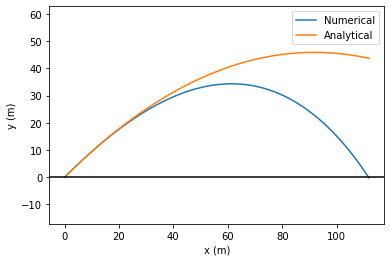

In [74]:
ProjectileMotionApp()

# Spinning Balls
## Lecture 6

## Effects of spin

We've seen air drag can considerable change the range of a projectile - and is true for both cannon shells and baseballs. In addition, it turns out that *spin* can radically affect the trajectory of projectile. This is called the Magnus effect or Magnus Force.



### Magnus Force

Let's model this so-called Magnus force and add it in to our computational model for projectile motion.  Consider the drag acting on either side of a spinning ball rotating at a angular velocity $\omega$.

<a title="Rdurkacz [CC BY-SA 3.0 (https://creativecommons.org/licenses/by-sa/3.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Sketch_of_Magnus_effect_with_streamlines_and_turbulent_wake.svg"><img width="512" alt="Sketch of Magnus effect with streamlines and turbulent wake" src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Sketch_of_Magnus_effect_with_streamlines_and_turbulent_wake.svg/512px-Sketch_of_Magnus_effect_with_streamlines_and_turbulent_wake.svg.png"></a>

We know that $F_{drag}$ depends on the relative velocity of the ball with the air.  When the ball is spinning, one side is moving faster and one side is moving slower relative to the air. Hence, the drag forces on each side are not the same.

So the next spin-dependent force should have a functional form like

$$ \frac{F_M}{m}= C_M \omega v_x $$

For a thrown baseball, we can assume that the velocity is predominantly in the $x$-direction. So the Magnus force will act in direction perpendicular to both the $x$-direction and the axis of rotation.   

In the fully general case, we would need to consider a cross-product like 

$$\frac{\vec{F}_M}{m} = C_M \vec{\omega} \times \vec{v}$$

for the Magnus effect.

To add the effect of the Magnus force into our numerical solution to investigate the dynamics of a curve ball we need to think about our trajectory in all three dimensions.  

The total force on the baseball is given by

$$ \frac{\vec{F}}{m} = \vec{g} - C_D |\vec{v}| \vec{v} + C_M \left( \vec{\omega} \times \vec{v} \right) $$

The complete equations of motion are


\begin{align}
\frac{d x}{dt} &= v_x \\
\frac{d y}{dt} &= v_y \\
\frac{d z}{dt} &= v_z \\
\frac{d v_x}{dt} &= - C_D v v_x + C_M \left(\omega_y v_z - \omega_z v_y\right)\\
\frac{d v_y}{dt} &= - C_D v v_y + C_M \left(\omega_z v_x - \omega_x v_z\right) \\ 
\frac{d v_z}{dt} &= - C_D v v_z + C_M \left(\omega_x v_y - \omega_y v_x\right) - g
\end{align}

Here, the positive $z$-axis is taken as the vertical direction (up) direction.



## Code with rotation

Using Euler's method once again gives us the following code. Air drag forces and the Magnus forces are included all three directions.

In [75]:
def BaseballStepper(dt=0.01, 
                    x0=0, y0=0, z0=3,
                    vx0=10, vy0=0, vz0=0,
                    ωx=0, ωy=0, ωz=0,
                    tmax=4):
    """
    Solve for the motion of a spinning baseball with air drag using Euler's method
    
    x, y, z are the positions
    vx, vy, vz are the velocity components
    ωx, ωy, ωz are components of the angular velocity vector
    """
    
    # initialize the model
    t = 0
    x = x0
    y = y0
    z = z0
    vx = vx0
    vy = vy0
    vz = vz0
    
    while True:
        model = {'t': t, 
                 'x': x, 'y': y, 'z': z,
                 'vx': vx, 'vy': vy, 'vz': vz}
        yield model # return the model state back to the caller
    
        if t > tmax:
            break
        if z < 0: # stop if the ball hits the ground
            break
            
        # drag forces (per unit mass)
        v = np.sqrt(vx**2+vy**2+vz**2)
        # drag coefficient depends on speed
        CD = 0.5  ## depends on the shape of the object and the density of the fluid!
        Fdrag_x = -CD * v * vx
        Fdrag_y = -CD * v * vy
        Fdrag_z = -CD * v * vz
        
        # Magnus forces (per unit mass)
        CM = 4.1e-4
        Fmagnus_x = CM * (ωy*vz - ωz*vy)
        Fmagnus_y = CM * (ωz*vx - ωx*vz)
        Fmagnus_z = CM * (ωx*vy - ωy*vx)
        
        # net force (per unit mass) == net acceleration
        g = 9.81
        Fnet_x = Fdrag_x + Fmagnus_x
        Fnet_y = Fdrag_y + Fmagnus_y
        Fnet_z = Fdrag_z + Fmagnus_z - g
        
        # use the Euler algorithm to update the state of the model
        x = x + vx*dt
        y = y + vy*dt
        z = z + vz*dt
        vx = vx + Fnet_x * dt
        vy = vy + Fnet_y * dt
        vz = vz + Fnet_z * dt
        t = t + dt

In [76]:
def BaseballApp(ωx=0, ωy=0, ωz=0):
    
    # initial position
    x0 = 0
    y0 = 0
    z0 = 2 # m
    
    # initial velocity
    angle0 = 0 # degrees
    θ0 = np.deg2rad(angle0) # radians
    v0 = 50 # m/s (about 110 mph)
    
    vx0 = v0 * np.cos(θ0)
    vy0 = 0
    vz0 = v0 * np.sin(θ0)
    
    tmax = 10 # s
        
    # set up the model
    model = BaseballStepper(x0=x0, y0=y0, z0=z0,
                                vx0=vx0, vy0=vy0, vz0=vz0,
                                ωx=ωx, ωy=ωy, ωz=ωz,
                                tmax=tmax)
    
    # iterate the model
    ball = pd.DataFrame(model)

    # plot the results
    BaseballPlot(ball)

    return ball

In [77]:
def BaseballPlot(ball):
    
    fig, axs = plt.subplots(1,3, figsize=(16, 4))
    axs[0].plot(ball.x, ball.z)
    axs[0].set_xlabel('x (m)')
    axs[0].set_ylabel('z (m)')
    axs[0].axvline(0, color='r')
    axs[0].axhline(0, color='k')
    axs[0].set_title('Side View')
        
    axs[1].plot(ball.x, ball.y)
    axs[1].set_xlabel('x (m)')
    axs[1].set_ylabel('y (m)')
    axs[1].axvline(0, color='r')
    axs[1].axhline(0, color='b')
    axs[1].set_title('Top Down View')
    
    axs[2].plot(ball.y, ball.z)
    axs[2].set_xlabel('y (m)')
    axs[2].set_ylabel('z (m)')
    axs[2].axvline(0, color='b')
    axs[2].axhline(0, color='k')
    axs[2].set_title('Front View')
    


Investigate the behaviour of throwing a baseball with different amounts of spin alng different axes.

In [78]:
interactive(BaseballApp, 
            ωx=(-1000, 1000, 20),
            ωy=(-1000, 1000, 20),
            ωz=(-1000, 1000, 20)
           )

interactive(children=(IntSlider(value=0, description='ωx', max=1000, min=-1000, step=20), IntSlider(value=0, d…

- - -